In [1]:
import numpy as np

In [2]:
a = np.array([1, 1, 2, 3, 9, 9, 3])

In [8]:
U, V = np.unique(a, return_counts=True)

In [9]:
dict(dict(zip(U, V)))

{1: 2, 2: 1, 3: 2, 9: 2}

# Nearest neighbor for handwritten digit recognition

Packages needed
* `numpy`
* `matplotlib`
* `sklearn`

## 1. The MNIST dataset

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

In [11]:
## Load the training set
train_data = np.load("MNIST/train_data.npy")
train_label = np.load("MNIST/train_labels.npy")

## Load the testing set
test_data = np.load("MNIST/test_data.npy")
test_label = np.load("MNIST/test_labels.npy")

In [18]:
## Print out their dimensions
print(f"The dimensions of the training data are: {train_data.shape}")
print(f"The number of training Labels is: {len(train_label)}")
print(f"The dimensions of the testing data are: {test_data.shape}")
print(f"The number of testing Labels is: {len(test_label)}")

The dimensions of the training data are: (7500, 784)
The number of training Labels is: 7500
The dimensions of the testing data are: (1000, 784)
The number of testing Labels is: 1000


In [45]:
## Compute the number of examples of each digite
train_digit, train_counts = np.unique(train_label, return_counts=True)
print("Training set distribution")
print(dict(zip(train_digit, train_counts)))

print("Testing set distribution")
test_digit, test_counts = np.unique(test_label, return_counts=True)
print(dict(zip(test_digit, test_counts)))

Training set distribution
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
Testing set distribution
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


In [47]:
train_label[0]

9

## 2. Vizualizing the data
Each data point is stored as 784-dimensional vector. To visualize a data point, we first reshape it to 28x28 image.

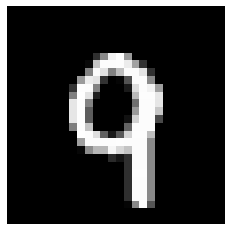

Label 9


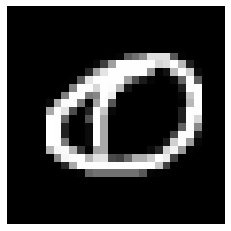

Label 0


In [80]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis("off")
    plt.imshow(x.reshape((28, 28)), cmap=plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index in a particular data set ("train" or "test") and display that image
def show_image_index(index, dataset="train"):
    if (dataset == "train"):
        show_digit(train_data[index,])
        label = train_label[index]
    else: 
        show_digit(test_data[index,])
        label = test_label[index]
    print("Label " + str(label))
    
    return

## View the first data point in the training set
show_image_index(0, "train")

## View the first data point in the test set
show_image_index(0, "test")

## 3. Squared Euclidean distance
Let $ x, y \in \mathbb{R}^d $ then the Euclidean distance between $x, y$ is: 
$$ \|x-y\|=\sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$$

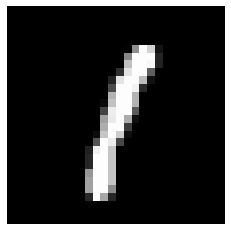

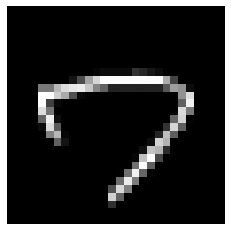

In [90]:
show_digit(train_data[5])
show_digit(train_data[4])

In [100]:
## Compute Euclidean distance between two vectors
def squared_dist(x, y):
    return np.sum(np.square(x-y))

## compute the distance between a 7 and a 1 in the training set
print(f"The distance from 7 to 1: {squared_dist(train_data[4], train_data[5])}")

## Compute the distance between a 7 and a 2 in our training set
print(f"The distance from 7 to 2: {squared_dist(train_data[5], train_data[1])}")

## Compute the distance between a 7 and a 7 in our training set
print(f"The distance from 7 to 7: {squared_dist(train_data[11], train_data[7])}")

The distance from 7 to 1: 5357193.0
The distance from 7 to 2: 11298533.0
The distance from 7 to 7: 5625440.0


In [79]:
train_label[5]

1

In [124]:
type(train_data)

numpy.ndarray

In [120]:
image = np.random.randint(4, 5, size=(10, 10))

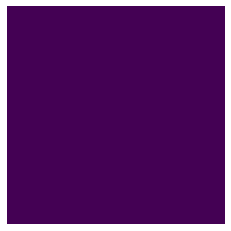

In [123]:
plt.axis("off")
plt.imshow(image);

## 4. Computing nearest neighbors

Now that we have a distance function defined. We can now turn to the nearest neighbors.

In [128]:
## Takes a vector x and return the index of its nearest neighbord in train_data
def find_NNI(x):
    distances = np.array([squared_dist(x, train_data[i]) for i in range(len(train_label))])
    #Get the index of the nearest neighbor
    return np.argmin(distances)

## Takes a vector x and return the class of its nearest neighbord in train_data
def find_NN_class(x):
    # Get the nearest neighbor index
    index = find_NNI(x)
    # Get the class of the nearest neighbor 
    return train_label[index]
    

A succes case: 
NN classification: 0
True Label:  0
The test image: 


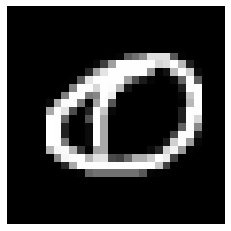

Label 0
The corresponding nearest neighbor image 


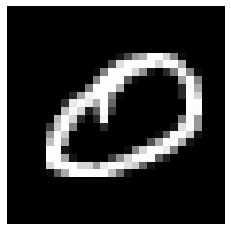

Label 0


In [130]:
## A succes case:
print("A succes case: ")
print("NN classification:", find_NN_class(test_data[0,]))
print("True Label: ", test_label[0])
print("The test image: ")
show_image_index(0, "test")
print("The corresponding nearest neighbor image ")
show_image_index(find_NNI(test_data[0,]), "train")


A failure case:
NN classification:  2
True label:  3
The test image:


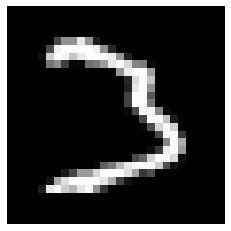

Label 3
The corresponding nearest neighbor image:


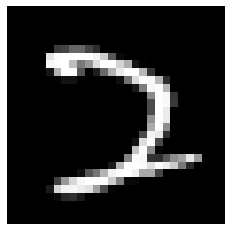

Label 2


In [131]:
## A failure case:
print("A failure case:")
print("NN classification: ", find_NN_class(test_data[39,]))
print("True label: ", test_label[39])
print("The test image:")
show_image_index(39, "test")
print("The corresponding nearest neighbor image:")
show_image_index(find_NNI(test_data[39,]), "train")

## 5. For you to try
The above two examples show the results of the NN classifier on test points number 0 and 39.

Now try test point number 100.
* What is the index of its nearest neighbor in the training set? _Record the answer: you will enter it as part of this week's assignment._
* Display both the test point and its nearest neighbor.
* What label is predicted? Is this the correct label?

In [144]:
print("Index of the nearest neighbor in the training set: ", find_NNI(test_data[100,]))

Nearest neighbor index:  4711


In [146]:
## The predicted label is the correct one
print("True Label: ", test_label[100])
print("Predicted Label: ", find_NN_class(test_data[100,]))

True Label:  4
Predicted Label:  4


## 6. Processing the full test set
Now let's apply our nearest neighbor classifier over the full test data set

In [147]:
## Predict on each test data point (and time it!)
t_before = time.time()
test_prediction = [find_NN_class(test_data[i,]) for i in range(len(test_label))]
t_after = time.time()

## Compute the error
error_position = np.not_equal(test_prediction, test_label)
error = float(np.sum(error_position)/len(test_label))

print(f"Error of nearest neighbor classifier: {error}")
print("Classification time (in second)", t_after - t_before)


Error of nearest neighbor classifier: 0.046
Classification time (in second) 50.74540066719055


## 7. Fastest neighbor methods
`scikit-learn` has fast implementation of two useful nearest neighbor data structure: the ball tree and the k-d tree

In [153]:
from sklearn.neighbors import BallTree
## Build nearest neighbor structure on training data
t_before = time.time()
ball_tree = BallTree(train_data)
t_after = time.time()

## Compute training time
t_training = t_after - t_before
print("Time to build data structure (in second): ", t_training)

## Get nearest neighbor prediction
t_before = time.time()
test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))
ball_tree_predictions = train_label[test_neighbors]
t_after = time.time()

## Compute testing time
t_testing = t_after - t_before
print("Time to classify test set (seconds): ", t_testing)

## Verify that the predictions are the same
print("Ball tree produces same predictions as above? ", np.array_equal(test_prediction, ball_tree_predictions))

Time to build data structure (in second):  0.7110154628753662
Time to classify test set (seconds):  7.622160911560059
Ball tree produces same predictions as above?  True
